<h1>2. Naive Bayes </h1>

# Set 1 (BOW) </br>
## 1.1 Loading Data

In [0]:
import numpy as np
import pandas as pd
import re
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

data = pd.read_csv("/content/drive/My Drive/Colab Notebooks/data/preprocessed_data.csv")

In [4]:
data.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


<h2>1.2 Splitting data into Train and cross validation(or test): Stratified Sampling</h2>

In [6]:
y =data['project_is_approved']
x = data.drop(['project_is_approved'],axis=1)
x.head()

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [0]:
X_train, X_test ,Y_train,Y_test = train_test_split(x,y,test_size = 0.25,stratify =y)
#X_train , X_cv ,Y_train ,Y_cv = train_test_split(X_train,Y_train,test_size =0.30,stratify =Y_train)

#I have not splitted train into cv data since i am going to use randomSearchcv 
#which performs cross validation internally

(81936, 8) (81936,)
(27312, 8) (27312,)
75.0 25.0
**************************************************
**************************************************


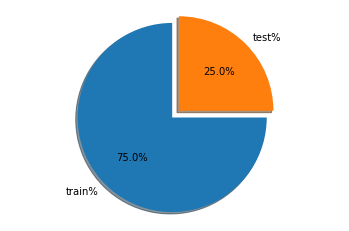

In [8]:
print(X_train.shape,Y_train.shape)

print(X_test.shape,Y_test.shape)
total = Y_train.shape[0] + Y_test.shape[0]
trainP = (Y_train.shape[0]/total)*100
testP = (Y_test.shape[0]/total)*100

print(trainP,testP)
print("*"*50)
print("*"*50)
##pie chart reference : https://matplotlib.org/3.2.1/gallery/pie_and_polar_charts/pie_features.html
labels = ['train%','test%']
sizes = [trainP,testP]
explode = (0.1,0)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()



<h2>1.3 Make Data Model Ready: encoding eassay, and project_title</h2>

<h2>1.4 Make Data Model Ready: encoding numerical, categorical features</h2>

## Encoding features :Essays

In [11]:
vectorizer = CountVectorizer(min_df =10,ngram_range =(1,4))
vectorizer.fit(X_train['essay'].values)

X_train_essay_bow = vectorizer.transform(X_train['essay'].values)
X_test_essay_bow = vectorizer.transform(X_test['essay'].values)


print("After vectorizations")
print(X_train_essay_bow.shape, Y_train.shape)

print(X_test_essay_bow.shape, Y_test.shape)
print("="*100)


After vectorizations
(81936, 291944) (81936,)
(27312, 291944) (27312,)


# Encoding categorical features :</br>
school_state,teacher_prefix,project_grade_category,clean_categories,clean_subcategories

### school_state

In [12]:
vectorizer = CountVectorizer()

#school_state
X_train_school_state_bow =vectorizer.fit_transform(X_train['school_state'].values)
X_test_school_state_bow = vectorizer.transform(X_test['school_state'].values)


print("After vectorizations")
print(X_train_school_state_bow.shape, Y_train.shape)

print(X_test_school_state_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(81936, 51) (81936,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## teacher_prefix

In [13]:
vectorizer = CountVectorizer()

#school_state
X_train_teacher_prefix_bow =vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_bow = vectorizer.transform(X_test['teacher_prefix'].values)


print("After vectorizations")
print(X_train_teacher_prefix_bow.shape, Y_train.shape)

print(X_test_teacher_prefix_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(81936, 5) (81936,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### project_grade_category

In [14]:
vectorizer = CountVectorizer()

#school_state
X_train_project_grade_category_bow =vectorizer.fit_transform(X_train['project_grade_category'].values)
X_test_project_grade_category_bow = vectorizer.transform(X_test['project_grade_category'].values)
#X_cv_project_grade_category_bow = vectorizer.transform(X_cv['project_grade_category'].values)

print("After vectorizations")
print(X_train_project_grade_category_bow.shape, Y_train.shape)
#print(X_cv_project_grade_category_bow.shape, Y_cv.shape)
print(X_test_project_grade_category_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(81936, 4) (81936,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### clean_categories

In [15]:
vectorizer = CountVectorizer()

#school_state
X_train_clean_categories_bow =vectorizer.fit_transform(X_train['clean_categories'].values)
X_test_clean_categories_bow = vectorizer.transform(X_test['clean_categories'].values)
#X_cv_clean_categories_bow = vectorizer.transform(X_cv['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_bow.shape, Y_train.shape)
#print(X_cv_clean_categories_bow.shape, Y_cv.shape)
print(X_test_clean_categories_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(81936, 9) (81936,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### clean_subcategories

In [16]:
vectorizer = CountVectorizer()

#school_state
X_train_clean_subcategories_bow =vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_bow = vectorizer.transform(X_test['clean_subcategories'].values)
#X_cv_clean_subcategories_bow = vectorizer.transform(X_cv['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_bow.shape, Y_train.shape)
#print(X_cv_clean_subcategories_bow.shape, Y_cv.shape)
print(X_test_clean_subcategories_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

After vectorizations
(81936, 30) (81936,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


# Encoding Numerical Features </br>

### teacher_number_of_previously_posted_projects

In [17]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_teacher_number_of_previously_posted_projects_norm=normalizer.fit_transform(X_train['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
X_test_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_test['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))
#X_cv_teacher_number_of_previously_posted_projects_norm = normalizer.transform(X_cv['teacher_number_of_previously_posted_projects'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_teacher_number_of_previously_posted_projects_norm.shape, Y_train.shape)
#print(X_cv_teacher_number_of_previously_posted_projects_norm.shape, Y_cv.shape)
print(X_test_teacher_number_of_previously_posted_projects_norm.shape, Y_test.shape)
print("="*100)


After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


# price

In [18]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
X_train_price_norm=normalizer.fit_transform(X_train['price'].values.reshape(-1,1))
X_test_price_norm = normalizer.transform(X_test['price'].values.reshape(-1,1))
#X_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(-1,1))

print("After vectorizations")
print(X_train_price_norm.shape, Y_train.shape)
#print(X_cv_price_norm.shape, Y_cv.shape)
print(X_test_price_norm.shape, Y_test.shape)
print("="*100)


After vectorizations
(81936, 1) (81936,)
(27312, 1) (27312,)


### concatenating all the features

In [19]:
from scipy.sparse import hstack

X_tr = hstack((X_train_essay_bow,X_train_school_state_bow,X_train_teacher_prefix_bow,X_train_project_grade_category_bow,\
               X_train_clean_categories_bow,X_train_clean_subcategories_bow,\
               X_train_teacher_number_of_previously_posted_projects_norm,X_train_price_norm)).tocsr()

X_ts = hstack((X_test_essay_bow,X_test_school_state_bow,X_test_teacher_prefix_bow,X_test_project_grade_category_bow,\
               X_test_clean_categories_bow,X_test_clean_subcategories_bow,\
               X_test_teacher_number_of_previously_posted_projects_norm,X_test_price_norm)).tocsr()
    
# X_cr = hstack((X_cv_essay_bow,X_cv_school_state_bow,X_cv_teacher_prefix_bow,X_cv_project_grade_category_bow,\
#                X_cv_clean_categories_bow,X_cv_clean_subcategories_bow,\
#                X_cv_teacher_number_of_previously_posted_projects_norm,X_cv_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr.shape, Y_train.shape)
#print(X_cr.shape, Y_cv.shape)
print(X_ts.shape, Y_test.shape)
print("="*100)

Final Data matrix
(81936, 292045) (81936,)
(27312, 292045) (27312,)


<h2>1.5 Appling NB on different kind of featurization as mentioned in the instructions</h2>

<br>Apply NB on different kind of featurization as mentioned in the instructions
<br> For Every model that you work on make sure you do the step 2 and step 3 of instrucations

In [0]:
# please write all the code with proper documentation, and proper titles for each subsection
# go through documentations and blogs before you start coding
# first figure out what to do, and then think about how to do.
# reading and understanding error messages will be very much helpfull in debugging your code
# when you plot any graph make sure you use 
    # a. Title, that describes your plot, this will be very helpful to the reader
    # b. Legends if needed
    # c. X-axis label
    # d. Y-axis label

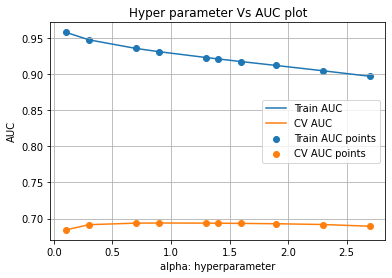

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
1,0.255631,0.002355,0.025293,0.000362,0.1,{'alpha': 0.1},0.678086,0.684516,0.690203,0.668912,0.689629,0.683126,0.682155,0.685652,0.676008,0.703883,0.684217,0.008937,10,0.957520,0.955425,0.957177,0.957603,0.958253,0.957268,0.956298,0.958587,0.958908,0.958366,0.957540,0.001019
4,0.255266,0.001895,0.023193,0.001361,0.3,{'alpha': 0.30000000000000004},0.687118,0.692422,0.695296,0.678124,0.696543,0.693131,0.688998,0.693431,0.682617,0.707006,0.691469,0.007555,8,0.946980,0.944907,0.946847,0.947149,0.947801,0.946679,0.945664,0.947918,0.948316,0.947811,0.947007,0.001009
7,0.253980,0.002091,0.021939,0.000807,0.7,{'alpha': 0.7000000000000001},0.689949,0.694287,0.695480,0.681624,0.698699,0.695765,0.691868,0.696987,0.685720,0.705511,0.693589,0.006402,3,0.935186,0.933066,0.935355,0.935425,0.935941,0.935017,0.933594,0.935857,0.936340,0.935777,0.935156,0.000992
2,0.257305,0.003774,0.026165,0.001536,0.9,{'alpha': 0.9},0.689863,0.694456,0.695795,0.682416,0.698777,0.695212,0.691991,0.697443,0.687027,0.704666,0.693764,0.005973,1,0.930613,0.928559,0.930946,0.930949,0.931429,0.930521,0.928953,0.931262,0.931779,0.931085,0.930609,0.000994
9,0.254308,0.004407,0.021853,0.001024,1.3,{'alpha': 1.3},0.689538,0.694818,0.696412,0.681778,0.698149,0.694721,0.692120,0.697998,0.687770,0.702666,0.693597,0.005704,2,0.922512,0.920587,0.923197,0.923029,0.923351,0.922534,0.920815,0.923203,0.923581,0.922847,0.922566,0.000987


In [21]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform
#after plotting auc plot for various values of alpha found out that beat alpha is in range 0-3
#generating decimal list in a range
#https://stackoverflow.com/questions/477486/how-to-use-a-decimal-range-step-value
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html


#initializing the classifier
multinb = MultinomialNB()


#generating decimal list in a range
#https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.arange.html
parameters = {'alpha':list(np.arange(0,3,0.1))}



#perform 10 fold cross validation
clf = RandomizedSearchCV(multinb,parameters,cv=10,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])


train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [22]:
clf.best_params_

{'alpha': 0.9}

so best alpha is 0.9 according to the curve

## Testing the performance of the model on test data, plotting ROC Curves

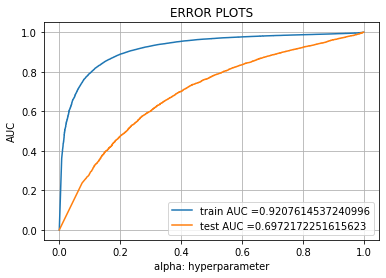

In [23]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


multinb = MultinomialNB(alpha=0.9)
multinb.fit(X_tr,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(multinb, X_tr_tfidf) 
y_train_pred=multinb.predict_proba(X_tr)[:,1]   
y_test_pred = multinb.predict_proba(X_ts)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

# Confusion Matrix

In [0]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [25]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.7242723753955508 for threshold 0.495
Train confusion matrix
[[10563  1844]
 [10380 59149]]
Test confusion matrix
[[ 1834  2301]
 [ 4372 18805]]


# set 2(TFIDF)

## Encoding Essays

In [26]:
vectorizer = TfidfVectorizer()
vectorizer.fit(X_train['essay'].values)

X_train_essay_tfidf = vectorizer.transform(X_train['essay'].values)
X_test_essay_tfidf = vectorizer.transform(X_test['essay'].values)
#X_cv_essay_tfidf = vectorizer.transform(X_cv['essay'].values)

print("After vectorizations")
print(X_train_essay_tfidf.shape, Y_train.shape)
#print(X_cv_essay_tfidf.shape, Y_cv.shape)
print(X_test_essay_tfidf.shape, Y_test.shape)
print("="*100)
essay = vectorizer.get_feature_names()


After vectorizations
(81936, 50401) (81936,)
(27312, 50401) (27312,)


# Encoding categorical features :</br>
school_state,teacher_prefix,project_grade_category,clean_categories,clean_subcategories

## school_state

In [27]:
vectorizer = TfidfVectorizer()

#school_state
X_train_school_state_bow =vectorizer.fit_transform(X_train['school_state'].values)
X_test_school_state_bow = vectorizer.transform(X_test['school_state'].values)
#X_cv_school_state_bow = vectorizer.transform(X_cv['school_state'].values)

print("After vectorizations")
print(X_train_school_state_bow.shape, Y_train.shape)
#print(X_cv_school_state_bow.shape, Y_cv.shape)
print(X_test_school_state_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
school_state = vectorizer.get_feature_names()


After vectorizations
(81936, 51) (81936,)
(27312, 51) (27312,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


## teacher_prefix

In [28]:
vectorizer = TfidfVectorizer()


X_train_teacher_prefix_bow =vectorizer.fit_transform(X_train['teacher_prefix'].values)
X_test_teacher_prefix_bow = vectorizer.transform(X_test['teacher_prefix'].values)
#X_cv_teacher_prefix_bow = vectorizer.transform(X_cv['teacher_prefix'].values)

print("After vectorizations")
print(X_train_teacher_prefix_bow.shape, Y_train.shape)
#print(X_cv_teacher_prefix_bow.shape, Y_cv.shape)
print(X_test_teacher_prefix_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

teacher_prefix = vectorizer.get_feature_names()

After vectorizations
(81936, 5) (81936,)
(27312, 5) (27312,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


### project_grade_category

In [29]:
vectorizer = TfidfVectorizer()


X_train_project_grade_category_bow =vectorizer.fit_transform(X_train['project_grade_category'].values)
X_test_project_grade_category_bow = vectorizer.transform(X_test['project_grade_category'].values)
#X_cv_project_grade_category_bow = vectorizer.transform(X_cv['project_grade_category'].values)

print("After vectorizations")
print(X_train_project_grade_category_bow.shape, Y_train.shape)
#print(X_cv_project_grade_category_bow.shape, Y_cv.shape)
print(X_test_project_grade_category_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
project_grade_category =vectorizer.get_feature_names()

After vectorizations
(81936, 4) (81936,)
(27312, 4) (27312,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


### clean_categories

In [30]:
vectorizer = TfidfVectorizer()


X_train_clean_categories_bow =vectorizer.fit_transform(X_train['clean_categories'].values)
X_test_clean_categories_bow = vectorizer.transform(X_test['clean_categories'].values)
#X_cv_clean_categories_bow = vectorizer.transform(X_cv['clean_categories'].values)

print("After vectorizations")
print(X_train_clean_categories_bow.shape, Y_train.shape)
#print(X_cv_clean_categories_bow.shape, Y_cv.shape)
print(X_test_clean_categories_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)
clean_categories =vectorizer.get_feature_names()

After vectorizations
(81936, 9) (81936,)
(27312, 9) (27312,)
['appliedlearning', 'care_hunger', 'health_sports', 'history_civics', 'literacy_language', 'math_science', 'music_arts', 'specialneeds', 'warmth']


### clean_subcategories

In [31]:
vectorizer = TfidfVectorizer()


X_train_clean_subcategories_bow =vectorizer.fit_transform(X_train['clean_subcategories'].values)
X_test_clean_subcategories_bow = vectorizer.transform(X_test['clean_subcategories'].values)
#X_cv_clean_subcategories_bow = vectorizer.transform(X_cv['clean_subcategories'].values)

print("After vectorizations")
print(X_train_clean_subcategories_bow.shape, Y_train.shape)
#print(X_cv_clean_subcategories_bow.shape, Y_cv.shape)
print(X_test_clean_subcategories_bow.shape, Y_test.shape)
print(vectorizer.get_feature_names())
print("="*100)

clean_subcategories = vectorizer.get_feature_names()

After vectorizations
(81936, 30) (81936,)
(27312, 30) (27312,)
['appliedsciences', 'care_hunger', 'charactereducation', 'civics_government', 'college_careerprep', 'communityservice', 'earlydevelopment', 'economics', 'environmentalscience', 'esl', 'extracurricular', 'financialliteracy', 'foreignlanguages', 'gym_fitness', 'health_lifescience', 'health_wellness', 'history_geography', 'literacy', 'literature_writing', 'mathematics', 'music', 'nutritioneducation', 'other', 'parentinvolvement', 'performingarts', 'socialsciences', 'specialneeds', 'teamsports', 'visualarts', 'warmth']


# concatenating all the features

In [33]:
from scipy.sparse import hstack

X_tr_tfidf = hstack((X_train_essay_tfidf,X_train_school_state_bow,X_train_teacher_prefix_bow,X_train_project_grade_category_bow,\
               X_train_clean_categories_bow,X_train_clean_subcategories_bow,\
               X_train_teacher_number_of_previously_posted_projects_norm,X_train_price_norm)).tocsr()

X_ts_tfidf = hstack((X_test_essay_tfidf,X_test_school_state_bow,X_test_teacher_prefix_bow,X_test_project_grade_category_bow,\
               X_test_clean_categories_bow,X_test_clean_subcategories_bow,\
               X_test_teacher_number_of_previously_posted_projects_norm,X_test_price_norm)).tocsr()
    
# X_cr_tfidf = hstack((X_cv_essay_tfidf,X_cv_school_state_bow,X_cv_teacher_prefix_bow,X_cv_project_grade_category_bow,\
#                X_cv_clean_categories_bow,X_cv_clean_subcategories_bow,\
#                X_cv_teacher_number_of_previously_posted_projects_norm,X_cv_price_norm)).tocsr()

print("Final Data matrix")
print(X_tr_tfidf.shape, Y_train.shape)
print(X_ts_tfidf.shape, Y_test.shape)

print("="*100)

Final Data matrix
(81936, 50502) (81936,)
(27312, 50502) (27312,)


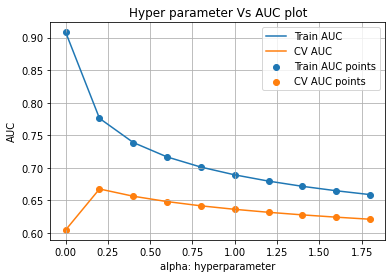

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,split5_test_score,split6_test_score,split7_test_score,split8_test_score,split9_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,split5_train_score,split6_train_score,split7_train_score,split8_train_score,split9_train_score,mean_train_score,std_train_score
0,0.097784,0.001447,0.010487,0.000277,0,{'alpha': 0.0},0.613787,0.605995,0.619796,0.602767,0.598535,0.608009,0.599296,0.583226,0.607791,0.606580,0.604578,0.009317,10,0.908686,0.908544,0.907795,0.908688,0.907985,0.908416,0.906908,0.907944,0.908866,0.908122,0.908195,0.000551
1,0.098156,0.001679,0.010358,0.000159,0.2,{'alpha': 0.2},0.659857,0.668904,0.666379,0.667264,0.680550,0.673585,0.661750,0.662790,0.659984,0.673628,0.667469,0.006468,1,0.777307,0.776582,0.776483,0.775973,0.775946,0.776194,0.772176,0.775605,0.776026,0.777066,0.775936,0.001349
2,0.098906,0.001328,0.010546,0.000220,0.4,{'alpha': 0.4},0.647434,0.656834,0.654557,0.656011,0.671316,0.661549,0.650152,0.654818,0.648293,0.662231,0.656319,0.006887,2,0.740238,0.739196,0.739375,0.738812,0.738482,0.739123,0.735564,0.738457,0.738876,0.739841,0.738796,0.001202
3,0.097475,0.000653,0.010547,0.000804,0.6,{'alpha': 0.6000000000000001},0.638840,0.648683,0.646257,0.647408,0.663792,0.652608,0.641466,0.648037,0.639868,0.653837,0.648079,0.007080,3,0.718102,0.716865,0.717227,0.716667,0.716131,0.717005,0.713840,0.716340,0.716720,0.717573,0.716647,0.001083
4,0.098335,0.001742,0.010212,0.000125,0.8,{'alpha': 0.8},0.632167,0.642700,0.639898,0.640446,0.657575,0.645396,0.634549,0.642457,0.633200,0.647266,0.641565,0.007191,4,0.702513,0.701143,0.701638,0.701068,0.700412,0.701426,0.698599,0.700793,0.701162,0.701858,0.701061,0.000989


In [34]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import uniform
#after plotting auc plot for various values of alpha found out that beat alpha is in range 0-2
#generating decimal list in a range
#https://stackoverflow.com/questions/477486/how-to-use-a-decimal-range-step-value
#https://docs.scipy.org/doc/numpy/reference/generated/numpy.linspace.html


#initializing the classifier
multinb = MultinomialNB()


#generating decimal list in a range
#https://docs.scipy.org/doc/numpy-1.10.1/reference/generated/numpy.arange.html
parameters = {'alpha':list(np.arange(0,2,0.2))}

clf = RandomizedSearchCV(multinb,parameters,cv=10,scoring='roc_auc',return_train_score=True)
clf.fit(X_tr_tfidf,Y_train)


results = pd.DataFrame.from_dict(clf.cv_results_)
results = results.sort_values(['param_alpha'])


train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
K =  results['param_alpha']

plt.plot(K, train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(K, cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(K, train_auc, label='Train AUC points')
plt.scatter(K, cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [35]:
clf.best_params_

{'alpha': 0.2}

so best alpha according to graph is 0.2

# Testing the performance of the model on test data, plotting ROC Curves

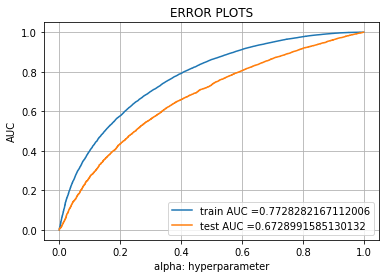

In [36]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc


multinb = MultinomialNB(alpha=0.2)
multinb.fit(X_tr_tfidf,Y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

#y_train_pred = batch_predict(multinb, X_tr_tfidf) 
y_train_pred=multinb.predict_proba(X_tr_tfidf)[:,1]   
y_test_pred = multinb.predict_proba(X_ts_tfidf)[:,1]


train_fpr, train_tpr, tr_thresholds = roc_curve(Y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(Y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

## Confusion Matrix

In [38]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(Y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(Y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.49045972669055765 for threshold 0.885
Train confusion matrix
[[ 8711  3696]
 [20959 48570]]
Test confusion matrix
[[ 2337  1798]
 [ 7299 15878]]


# Finding out The top 20 features

In [45]:
#extracting log_prob values from the classifier

log_prob = list(multinb.feature_log_prob_)
print(log_prob)


[array([-10.6699719 , -10.08259488, -13.84492208, ...,  -8.24879343,
        -3.20102215,  -2.80945194]), array([-10.97174792,  -9.87828767, -14.76653002, ...,  -7.42751134,
        -3.09264734,  -2.78239669])]


In [46]:
#the function feature_log_prob_ returns n_classes, n_features so we need features values
log_prob=list(log_prob[1])
print(len(log_prob))
print(log_prob)

50502
[-10.971747923918766, -9.878287668790492, -14.76653001926567, -15.541336693347448, -14.76795766943795, -13.82701995494747, -14.775276378653729, -13.158653245125437, -13.988481501054046, -14.892068105018156, -14.436103166768365, -14.678446169257857, -14.363915463640177, -15.160107821558167, -14.869089526407816, -14.922327641527447, -15.00498419021319, -14.952663102456029, -13.716057002702112, -14.956433270385213, -14.904150506067044, -14.679785300844436, -14.94920098877458, -14.938052730254745, -13.527773558211194, -15.002272838809356, -14.789302402058327, -14.693526582026779, -14.82141783669057, -15.041057137016887, -15.541336693347448, -15.062182937107544, -14.933463482865506, -15.013826585401292, -14.91446391307544, -14.418376474580569, -14.321883219758268, -14.97991601689818, -14.908844100155145, -14.809203521015723, -15.541336693347448, -14.136387721891618, -8.75788202112866, -8.239448699048188, -11.102362591598157, -14.993262308484866, -15.541336693347448, -15.0312176987825,

In [47]:
#combining all the feature names to extract top 20 feature names based on log_prob score

#here the order in which data was combined after encoding matters
#so same order is maintained
feature_names = essay + school_state +teacher_prefix+project_grade_category+clean_categories +clean_subcategories
feature_names.append('teacher_number_of_previously_posted_projects')
feature_names.append('price')

print(len(feature_names))

50502


In [48]:
#coverting to dataframe to extract top 20 feature names  easily
df = pd.DataFrame({'feature_names':feature_names,
                   'log_prob_score':log_prob})

df =df.sort_values('log_prob_score',ascending=False,ignore_index=True)
df.head(20)


,feature_names,log_prob_score
0,price,-2.782397
1,teacher_number_of_previously_posted_projects,-3.092647
2,mrs,-3.416442
3,grades_prek_2,-3.683928
4,literacy_language,-3.755879
5,ms,-3.821348
6,grades_3_5,-3.853526
7,math_science,-3.973203
8,literacy,-4.276611
9,mathematics,-4.476992


In [49]:
top20_features = df.feature_names[:20]
print(top20_features)

0                                            price
1     teacher_number_of_previously_posted_projects
2                                              mrs
3                                    grades_prek_2
4                                literacy_language
5                                               ms
6                                       grades_3_5
7                                     math_science
8                                         literacy
9                                      mathematics
10                              literature_writing
11                                      grades_6_8
12                                              ca
13                                        students
14                                   health_sports
15                                    specialneeds
16                                     grades_9_12
17                                    specialneeds
18                                              mr
19                             

<h1>3. Summary</h1>

<br> as mentioned in the step 5 of instructions

<img src='http://i.imgur.com/YVpIGGE.jpg' width=400px>

In [51]:
vectorizer =['BOW','TFIDF']
Model = ['Naive Bayes','Naive Bayes']
Hyper_parameter = [0.9 ,0.2]

Test_AUC = [0.6972172251615623,0.6728991585130132]
Train_AUC = [0.9207614537240996,0.7728282167112006]

summary = pd.DataFrame({'vectorizer':vectorizer,'Model':Model,'Hyper_parameter':Hyper_parameter,'Test_AUC':Test_AUC,
                       'Train_AUC':Train_AUC })
summary

,vectorizer,Model,Hyper_parameter,Test_AUC,Train_AUC
0,BOW,Naive Bayes,0.9,0.697217,0.920761
1,TFIDF,Naive Bayes,0.2,0.672899,0.772828
